In [1]:
import numpy as np
import ast
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.cm as cmx
# For color mapping
import matplotlib.colors as colors

directorio='G:\\Redes\\'
version=1

In [2]:
# Cargamos una red previamente guardada en un archivo

N=3000000
i=0
G=nx.DiGraph()
archivo = open(directorio+'archivo_red_'+str(version)+'.txt','r',encoding='utf-8')
for line in archivo:
    i+=1
    G.add_edges_from([(line.split()[0],line.split()[1])])
    if i==N:
        break
archivo.close()
print(len(G),i)

110415 103456


In [3]:
# Separamos las componentes conectadas, al costo de volver a una red no dirigida

GG=G.to_undirected()
Componente_INT=sorted(nx.connected_components(GG), key=len, reverse=True)
Componentes=[]

for i in Componente_INT:
    Componentes.append(GG.subgraph(i))

In [4]:
# Se abre el archivo de atributos que necesitamos

archivo = open(directorio+'archivo_fos_'+str(version)+'.txt','r',encoding='utf-8')
i=0
j=0
N=1000000
fos = {}
for line in archivo:
    i+=1
    a=line.split('[')[1].split(']')[0].split(', ')
    for tag in range(len(a)):
            try:
                b=fos[a[tag]]
                b+=1
                fos.update({a[tag]:b})
            except:
                fos[a[tag]]=1
    if i==N:
        break
archivo.close()

In [5]:
# Cargamos los atributos a cada uno de los nodos

archivo = open(directorio+'archivo_fos_'+str(version)+'.txt','r',encoding='utf-8')
i=0
j=0
for line in archivo:
    i+=1
    a=line.split('[')[1].split(']')[0].split(', ')
    freq=np.zeros(len(a))
    try:
        for k in range(len(a)):
            freq[k]=fos[a[k]]
        key=a[np.argmax(freq)]    
        G.node[line.split()[0]]['campo']=key
        j+=1
    except KeyError:
        pass
    if i==N:
        break
archivo.close()

In [74]:
def graficar_componente(G,comp,atributo):
    
    GG=[]
    GG=G.to_undirected()
    Componente_INT=sorted(nx.connected_components(GG), key=len, reverse=True)
    prueba_red=[]
    prueba_red=Componente_INT[comp]

    campos_list=[]

    for paper in prueba_red:
        campos_list.append(G.node[paper][atributo])
    
    grupo={}
    
    x={}
    
    sorted_by_value = []
    x=frequency(campos_list)
    
    sorted_by_value = sorted(x.items(), key=lambda kv: kv[1],reverse=True)
    
    cmap =[]
    cmap = cmx.rainbow(np.linspace(0.0, 1.0, len(sorted_by_value)))
    
    keys={}
    keys=sorted_by_value
    conversion={}
    for i in range(len(sorted_by_value)):
        conversion.update({sorted_by_value[i][0]: cmap[i]})

    color_map =[]  

    for paper in campos_list:
        color_map.append(conversion[paper])
    
    val_map = {}
    Lista_nodos =list(Componente_INT[comp])
    for i in range(len(list(Componente_INT[comp]))):
        val_map.update({Lista_nodos[i]: color_map[i]})
    
    Componente=G.subgraph(Componentes[comp+1:comp+2][0])
    
    options = {
    'node_size': 25,
    'width': 1,
    }
    pos=nx.kamada_kawai_layout(Componente)
    
    values = [val_map.get(node, 0) for node in Componente.nodes()]
    # Color mapping
    jet = cm = plt.get_cmap('jet')
    cNorm  = colors.Normalize(vmin=0, vmax=max(values))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

    # Using a figure to use it as a parameter when calling nx.draw_networkx
    f = plt.figure(1)
    ax = f.add_subplot(1,1,1)
    for label in conversion:
        ax.plot([3],[1],color=conversion[label],label=label,linestyle='',marker='.')
        ax.legend(loc="lower right", bbox_to_anchor=(0.6,0.5))
    # Just fixed the color map
    nx.draw_networkx(Componente,pos, cmap = jet, vmin=0, vmax= max(values),node_color=color_map,with_labels=False,ax=ax, **options)

    # Setting it to how it was looking before.                                                                                                              
    plt.axis('off')
    f.set_facecolor('w')

    plt.legend(numpoints = 1)

    f.tight_layout()
    plt.show()

In [6]:
#cmap=plt.cm.rainbow
comp=4
prueba_red=Componente_INT[comp]

campos_list=[]

for paper in prueba_red:
    campos_list.append(G.node[paper]['campo'])

In [71]:
def frequency(Lista):
    grupo={}
    for line in range(len(Lista)):
        try:
            b=grupo[Lista[line]]
            b+=1
            grupo.update({Lista[line]:b})
        except:
            grupo[Lista[line]]=1
    return(grupo)

In [8]:
grupo={}
x=frequency(campos_list)
sorted_by_value = sorted(x.items(), key=lambda kv: kv[1],reverse=True)

In [9]:
cmap = cmx.rainbow(np.linspace(0.0, 1.0, len(sorted_by_value)))

In [10]:
keys=sorted_by_value
conversion={}
for i in range(len(sorted_by_value)):
    conversion.update({sorted_by_value[i][0]: cmap[i]})

color_map =[]  

for paper in campos_list:
    color_map.append(conversion[paper])

In [11]:
val_map = {}
Lista_nodos =list(Componente_INT[comp])
for i in range(len(list(Componente_INT[comp]))):
    val_map.update({Lista_nodos[i]: color_map[i]})

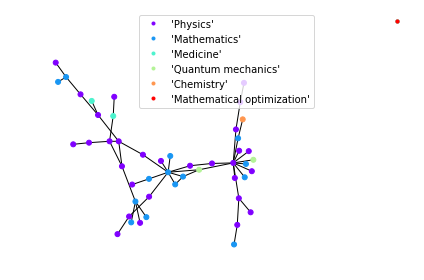

In [12]:
# You were missing the position.
options = {
'node_size': 25,
'width': 1,
}
pos=nx.spring_layout(Componentes[comp+1:comp+2][0])
#val_map = {'kind1': 2,'kind2': 2,'kind3': 2,'kind4': 1,'kind5':4,'kind6': 3}
#I had this list for the name corresponding t the color but different from the node name
#ColorLegend = {'Obsolete': 2,'Initialisation': 1,'Draft': 4,'Release': 3}
values = [val_map.get(node, 0) for node in Componentes[comp+1:comp+2][0].nodes()]
# Color mapping
jet = cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=max(values))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

# Using a figure to use it as a parameter when calling nx.draw_networkx
f = plt.figure(1)
ax = f.add_subplot(1,1,1)
for label in conversion:
    #ax.plot([0],[0],color=scalarMap.to_rgba(conversion[label]),label=label,linestyle='',marker='.')
    ax.plot([2],[1],color=conversion[label],label=label,linestyle='',marker='.')
    ax.legend(loc="lower right", bbox_to_anchor=(0.6,0.5))
# Just fixed the color map
nx.draw_networkx(Componentes[comp+1:comp+2][0],pos, cmap = jet, vmin=0, vmax= max(values),node_color=color_map,with_labels=False,ax=ax, **options)

# Setting it to how it was looking before.                                                                                                              
plt.axis('off')
f.set_facecolor('w')

plt.legend(numpoints = 1)

f.tight_layout()
plt.show()

In [13]:
Componente=G.subgraph(Componentes[comp+1:comp+2][0])

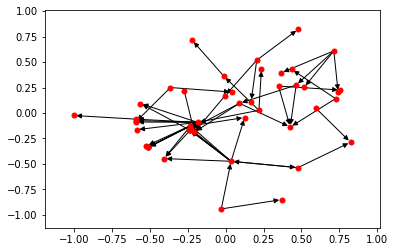

In [19]:
pos=nx.kamada_kawai_layout(Componente)
#pos = hierarchy_pos(Componente,1)  
nx.draw_networkx(Componente,pos=pos, with_labels=False, **options)

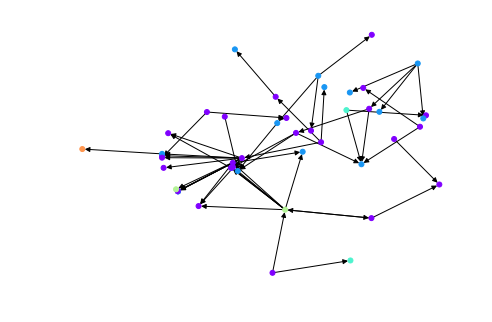

In [21]:
nx.draw_kamada_kawai(Componente,node_color = color_map, **options)
#p=nx.drawing.nx_pydot.to_pydot(Componente)
plt.show()
#p.write_png('example.png')

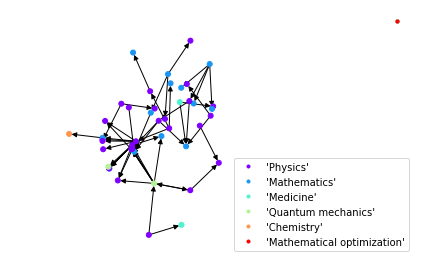

In [24]:
options = {
'node_size': 25,
'width': 1,
}
pos=nx.kamada_kawai_layout(Componente)
#val_map = {'kind1': 2,'kind2': 2,'kind3': 2,'kind4': 1,'kind5':4,'kind6': 3}
#I had this list for the name corresponding t the color but different from the node name
#ColorLegend = {'Obsolete': 2,'Initialisation': 1,'Draft': 4,'Release': 3}
values = [val_map.get(node, 0) for node in Componente.nodes()]
# Color mapping
jet = cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=max(values))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

# Using a figure to use it as a parameter when calling nx.draw_networkx
f = plt.figure(1)
ax = f.add_subplot(1,1,1)
for label in conversion:
    #ax.plot([0],[0],color=scalarMap.to_rgba(conversion[label]),label=label,linestyle='',marker='.')
    ax.plot([3],[1],color=conversion[label],label=label,linestyle='',marker='.')
    ax.legend(loc="lower right", bbox_to_anchor=(0.6,0.5))
# Just fixed the color map
nx.draw_networkx(Componente,pos, cmap = jet, vmin=0, vmax= max(values),node_color=color_map,with_labels=False,ax=ax, **options)

# Setting it to how it was looking before.                                                                                                              
plt.axis('off')
f.set_facecolor('w')

plt.legend(numpoints = 1)

f.tight_layout()
plt.show()

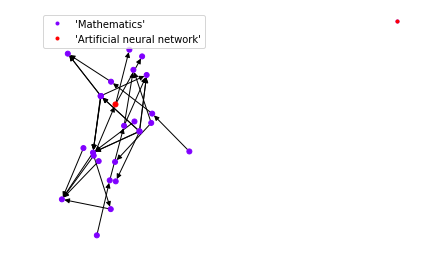

In [79]:
graficar_componente(G,30,'campo')

In [80]:
archivo = open(directorio+'archivo_year_'+str(version)+'.txt','r',encoding='utf-8')
i=0
for line in archivo:
    i+=1
    try:
        G.node[line.split()[0]]['year']=int(line.split()[1])
    except KeyError:
        pass
    if i==N:
        break
archivo.close()

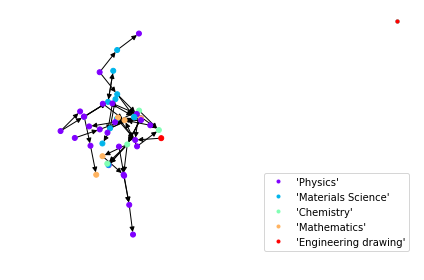

In [86]:
graficar_componente(G,3,'campo')